In [1]:
!# pip install stop_words

  Using cached https://files.pythonhosted.org/packages/1c/cb/d58290804b7a4c5daa42abbbe2a93c477ae53e45541b1825e86f0dfaaf63/stop-words-2018.7.23.tar.gz
  Created wheel for stop-words: filename=stop_words-2018.7.23-cp38-none-any.whl size=32917 sha256=14edf21c93b9dc77075830c5447210cad39257b9fd696f47f927715ac2605b47
  Stored in directory: C:\Users\bilal\AppData\Local\pip\Cache\wheels\75\37\6a\2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
#! pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.columns=['Class','Text']
df['Label']=df.Class.map({'ham':0,'spam':1})
df.head()

,Class,Text,Label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
df.groupby('Class').describe(include='O')

Text                                                               
      count unique                                                top freq
Class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

<AxesSubplot:xlabel='Class', ylabel='count'>

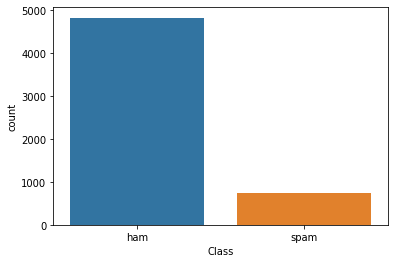

In [7]:
sns.countplot(data=df,x='Class')

In [8]:
Ham_texts=df.query("Class=='ham'")['Text']
Spam_texts=df.query("Class=='spam'")['Text']

In [9]:
def words_cleaner(data):
    words=[re.sub('[^a-zA-Z]','',i)for i in df['Text']]
    words=[i.lower()for j in data for i in j.split()]
    words=[i for i in words if not i in set(stopwords.words('english'))]
    words=[i for i in words if len(i)>2]
    return words

In [10]:
def wc (data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor,max_words=100)
    wc.generate(''.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [11]:
Ham_texts=df.query("Class=='ham'")['Text']
ham_words=words_cleaner(Ham_texts)
ham_words_freq=nltk.FreqDist(ham_words)
ham_words_freq=pd.DataFrame(ham_words_freq.most_common(10),columns=['Top_Words','Frequency'])

In [12]:
ham_words_freq

,Top_Words,Frequency
0,i'm,369
1,get,293
2,&lt;#&gt;,276
3,got,227
4,like,221
5,call,215
6,come,215
7,know,208
8,good,187
9,i'll,167


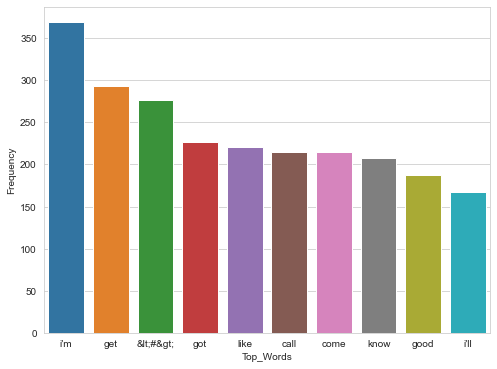

In [13]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
ax=sns.barplot(x='Top_Words',y='Frequency',data=ham_words_freq)

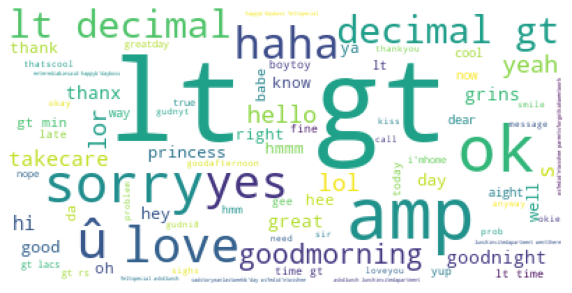

In [14]:
wc(ham_words,'white')

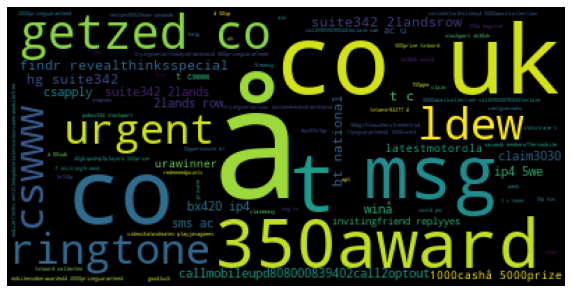

In [15]:
wc(words_cleaner(Spam_texts),'black')

In [16]:
def features_cleaner(data):
    clean_txt=[]
    for i in range(0,len(data)):
        text=re.sub('[^a-zA-Z]','',data[i])
        text=text.lower()
        text=text.split()
        ps=PorterStemmer()
        text=[ps.stem(j) for j in text if not j in set(stopwords.words('english'))]
        text=''.join(text)
        clean_txt.append(text)
    return clean_txt

    

In [17]:
X=features_cleaner(df['Text'])
y=df['Label']


In [18]:
for i in range(0,3):
    print(df['Text'][i])
    print('after cleaning')
for i in range(0,3):
    print(X[i])
    

    

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
after cleaning
Ok lar... Joking wif u oni...
after cleaning
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
after cleaning
gountiljurongpointcrazyavailableonlyinbugisngreatworldlaebuffetcinetheregotamorewat
oklarjokingwifuoni
freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyov


In [19]:
cv=CountVectorizer()
X=cv.fit_transform(X)
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=0.25, random_state=50)

In [20]:
classifier=MultinomialNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [21]:
cf_matrix=confusion_matrix(y_test,y_pred)
cf_matrix

array([[1193,    0],
       [ 196,    4]], dtype=int64)

<AxesSubplot:>

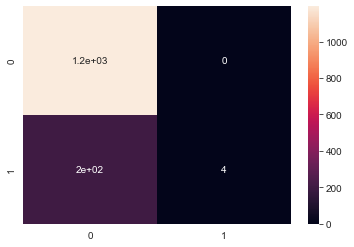

In [22]:
sns.heatmap(cf_matrix, annot=True)

In [23]:
accuracy_score(y_pred,y_test)

0.8592964824120602

In [24]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()

In [25]:
r.fit(X_train,y_train)
y_pred=r.predict(X_test)

In [26]:
r_matrix=confusion_matrix(y_test,y_pred)
r_matrix

array([[1193,    0],
       [ 141,   59]], dtype=int64)